In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Contour Features
## 1. Contour Approximation (Contour 근사)
    cv2.findContours 함수를 통해 찾은 Contours line에는 각각의 Contours point를 가지고 있다. 보통은 이 Point를 drawContours 함수를 이용하여 Line을 그리게 된다. 이 때 우리가 지정한 정밀도에 따라 Point의 꼭짓점의 수를 줄여가면서 기존의 Contours line에 근사한 line을 그릴 수 있다. 이 Point의 수를 줄이는데 Douglas-Peucker 알고리즘을 사용한다.
    
## cv2.approxPolyDP(curve, epsilon, closed [, approxCurve]) → approxCurve
    이 함수는 기존의 곡선, 다각형을 더 적은 꼭짓점을 가진 곡선, 다각형으로 근사하여 이들 사이의 거리가 지정된 정밀도보다 작거나 같게 한다. Douglas-Peucker 알고리즘을 사용하여 원래 곡선과 근사화된 곡선 사이의 최대 거리를 기반으로 "dissimilar"를 정의한다. 단순화된 곡선은 원래 곡선에서 정의된 점들의 하위 집합으로 구성된다.

    1. curve : 2차원 포인터의 벡터가 들어간다. 
    2. epsilon(e, 오차) : 근사 정확도를 지정하는 파라미터로 기존의 곡선과 근사화된 곡선까지의 최대거리를 지정한다. 따라서 epsilon의 값을 최대한으로 하면서 꼭짓점을 줄여나가므로 이 파라미터의 값이 작을수록 원래의 곡선과 가까워져 비슷한 결과가 도출되고, 이 파라미터 값이 클 수록 기존의 곡선에서 멀어지므로 Contours의 갯수가 많이 줄어들어 보다 근본적인 형태에 더 가까워 진다. 다만 이 값이 너무 커지면 결국 꼭짓점의 갯수가 0인 점으로 돌아갈 수 있다.
    3. closed : 해당 곡선이 폐곡선인지의 여부를 알려주는 파라미터이다. arcLength 함수의 파라미터와 마찬가지로 폐곡선이면 True, 폐곡선이지 않으면 False를 전달한다.

Original 434.89444231987
epsilon 0.05 21.7447221159935
epsilon 0.08 34.791555385589604
epsilon 0.1 43.489444231987

Original Contour 갯수 142
Approx1 Contour 갯수 6
Approx2 Contour 갯수 4
Approx3 Contour 갯수 3


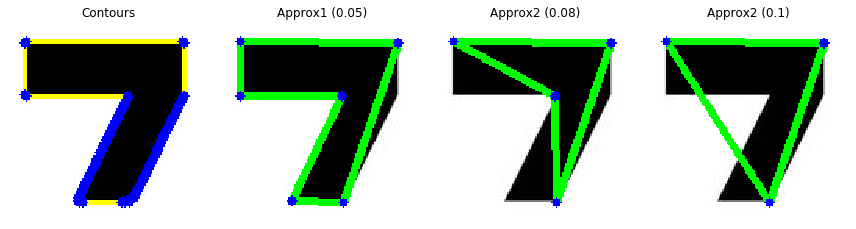

In [2]:
img = cv2.imread('cropped.jpg')
img1 = img.copy()
img2 = img.copy()
img3 = img.copy()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
res, thr = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[1]
cv2.drawContours(img, [cnt], -1, (255, 255, 0), 2)

epsilon1 = 0.05 * cv2.arcLength(cnt, True)
epsilon2 =  0.08 * cv2.arcLength(cnt, True)
epsilon3 = 0.1 * cv2.arcLength(cnt, True)

print('Original', cv2.arcLength(cnt, True))
print('epsilon 0.05', epsilon1)
print('epsilon 0.08', epsilon2)
print('epsilon 0.1', epsilon3)
print()

approx1 = cv2.approxPolyDP(cnt, epsilon1, True)
approx2 = cv2.approxPolyDP(cnt, epsilon2, True)
approx3 = cv2.approxPolyDP(cnt, epsilon3, True)

print('Original Contour 갯수', len(cnt))
print('Approx1 Contour 갯수', len(approx1))
print('Approx2 Contour 갯수', len(approx2))
print('Approx3 Contour 갯수', len(approx3))

cv2.drawContours(img1, [approx1], -1, (0, 255, 0), 3)
cv2.drawContours(img2, [approx2], -1, (0, 255, 0), 3)
cv2.drawContours(img3, [approx3], -1, (0, 255, 0), 3)

titles = ['Contours', 'Approx1 (0.05)', 'Approx2 (0.08)', 'Approx2 (0.1)']
images = [img, img1, img2, img3]
approx = [cnt, approx1, approx2, approx3]

for index in range(4):
    for i in range(len(approx[index])):
        for j in range(len(approx[index][i])):
            cv2.circle(images[index], (approx[index][i][j][0], approx[index][i][j][1]), 3, (0, 0, 255), -1)

plt.figure(figsize=(12, 12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.title(titles[i])
    plt.imshow(images[i])
    plt.axis('off')
    
plt.tight_layout()
plt.show()

---
## 2. Convex Hull
    Convex Hull(볼록 껍질)은 임의의 집합 X가 있을 때 X를 포함하는 가장 작은 집합을 말한다. openCV에서 Convex Hull은 Contour Point를 모두 포함하는 볼록한 외곽선을 의미한다. 결과적으로는 Contour 근사법과 비슷하지만 이를 추정하는 과정과 방법은 전혀 다르다. 

In [3]:
cv2.isContourConvex(cnt)

False

    먼저 cv2.isContourConvex(contour) 함수를 통해 이미지의 Contour가 볼록(Convex)한지 확인할 수 있다. 해당 함수는 인자로 Contour Point들의 집합을 전달하여 그 결과로 boolean 타입의 결과값을 반환받는다. 이 때 Contour Point들의 집합이 볼록하다면 True, 볼록하지 않으면 False 값을 반환한다. (볼록하다는 것은 Contour Line이 볼록하거나 평평한 선이라는 의미이다. 앞서 살펴본 cropped.jpg에서 'ㄱ'의 이미지는 완전히 볼록하지 않고 움푹 들어간 곳이 있음을 육안으로도 알 수 있다. 따라서 위의 코드는 False를 반환한다.) Contour Line이 볼록하지 않으면, 즉 False 값을 반환받으면 cv2.convexHull 함수를 사용하여 Contour Line을 볼록하게 만들 수 있다. 

## cv2.convexHull(points [, hull [, clockwise [, returnPoints]]]) → hull
    convexHull 함수는 곡선의 볼록 결함(오목한 부분)을 확인하고 수정한다.
    1. points : 2차원 포인터들의 집합을 입력으로 받는다.

Original Contour 갯수 142
Convex Hull Contour 갯수 11


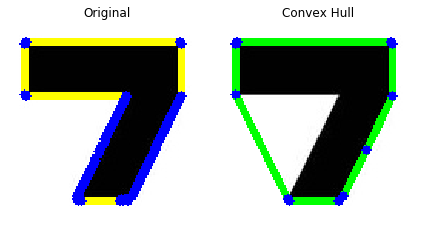

In [4]:
img = cv2.imread('cropped.jpg')
img1 = img.copy()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
res, thr = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[1]
hull = cv2.convexHull(cnt)
cv2.drawContours(img, [cnt], -1, (255, 255, 0), 3)
cv2.drawContours(img1, [hull], -1, (0, 255, 0), 3)

print('Original Contour 갯수', len(cnt))
print('Convex Hull Contour 갯수', len(hull))

titles = ['Original', 'Convex Hull']
images = [img, img1]
approx = [cnt, hull]

for index in range(2):
    for i in range(len(approx[index])):
        for j in range(len(approx[index][i])):
            cv2.circle(images[index], (approx[index][i][j][0], approx[index][i][j][1]), 3, (0, 0, 255), -1)

plt.figure(figsize=(6, 6))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(titles[i])
    plt.imshow(images[i])
    plt.axis('off')
    
plt.tight_layout()
plt.show()

In [5]:
cv2.isContourConvex(hull)

True

---
## 3. Bounding Rectangle
    Contours Line을 둘러싸는 사각형을 그리는 방법에는 총 2가지가 있다.
    1. Straight Bounding Rectangle : 대상의 Rotation 은 무시한 사각형 모양이다.
    2. Rotated Rectangle : 대상을 모두 포함하면서, 최소한의 영역을 차지하는 사각형 모양이다.

## cv2.boundingRect(array) → retval
    array 인자로 gray-scale 이미지나 2차원 포인터들의 집합을 입력받는다. 그렇게 입력받은 이미지로 gray-scale 이미지에서 0이 아닌 픽셀들이나 2차원 포인터 집합에서 똑바로 서있는 직사각형 중 가장 작은 직사각형을 계산하여 반환한다. 좌상단의 x좌표, y좌표, 너비, 높이 순으로 반환한다.

## cv2.minAreaRect(points) → points
    boundingRect와 마찬가지로 2차원 포인터 집합을 입력으로 받는다. 이 함수는 입력받은 2차원 포인터 집합을 바탕으로 입력받은 포인터들을 모두 포함하면서 최소한의 영역을 차지하는 직사각형을 찾는다. 이때 직사각형은 boundingRect 함수처럼 곧게 서있을 수도, 회전할 수도 있다. 좌상단의 x좌표, y좌표, 가로와 세로의 폭, 기울어진 각도 순으로 반환한다. 해당 반환값은 RotatedRect의 객체이다.
    
## cv2.boxPoints(box [, points]) → points
    boxPoints 함수는 회전된 직사각형의 4개의 꼭짓점을 찾는 함수로 회전된 직사각형을 그릴 때 유용하다. RotatedRect 타입의 데이터를 인자로 받으므로 cv2.minAreaRect 함수를 통해 얻은 반환값을 넣어준다. float형으로 2차원 포인터들의 집합으로 반환된다. 이미지에 이 좌표들을 그리기 위해서는 각각의 좌표가 정수형이어야 하므로 np.int0을 통해 해당 좌표를 int형으로 변환시켜준다.

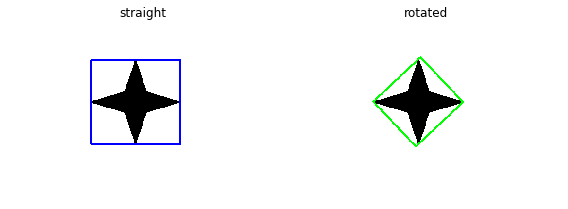

In [6]:
img = cv2.imread('bounding_rect.png')
img1 = img.copy()
img2 = img.copy()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
res, thr = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Straight Bounding Rectangle
cnt = contours[1]
x, y, w, h = cv2.boundingRect(cnt)
cv2.rectangle(img1, (x, y), (x+w, y+h), (0, 0, 255), 3)

# Rotated Rectangle
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img2, [box], 0, (0, 255, 0), 3)

images = [img1, img2]
titles = ['straight', 'rotated']
plt.figure(figsize=(8, 8))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(titles[i])
    plt.imshow(images[i])
    plt.axis('off')
    
plt.tight_layout()
plt.show()

In [2]:
def onChange(x):
    pass

img = cv2.imread('national_park_service_pictogramss.png')
img = cv2. resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
res, thr = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.namedWindow('Bounding Box')
cv2.createTrackbar('index', 'Bounding Box', 0, 44, onChange)

while True:
    img_copy = img.copy()
    cv2.imshow('Bounding Box', img_copy)
    
    index = cv2.getTrackbarPos('index', 'Bounding Box')
    cnt = contours[index]
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 0, 255), 1)
    
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(img_copy, [box], -1, (0, 255, 0), 1)
    cv2.imshow('Bounding Box', img_copy)
    
    
    k = cv2.waitKey(0) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()

---
## 4. Enclosing Circle & Fitting Ellipse
    앞에서는 Contours Point를 모두 포함하는 직사각형을 그리는 방법에 대해서 살펴봤지만 이번에는 Contours Point를 포함하는 원과 타원을 그려보자.

## cv2.minEnclosingCircle(points) → center, radius
    Contours Point들을 모두 포함하는 가장 작은 원을 찾는 함수이다. 앞서 bounding rectangle와 마찬가지로 인자로 2차원 포인터들의 집합을 전달하면 되며, 반환값으로는 순서대로 원의 중심의 x좌표와 y좌표, 반지름값을 반환받는다. 반환 값은 모두 float형이므로 따라서 int형으로 모두 바꿔주어야 한다. 다만, boxPoints처럼 2차원 포인트로 이루어진 배열이 아니기 때문에 그저 강제형변환 int함수만 사용해주면 된다.

## cv2.fitEllipse(points) → retval
    Contours Point를 감싸는 타원을 찾는 함수이다. 이때 중요한 것은 이 함수는 모든 Contours Point를 포함하지 않는다는 점이다. 첫번째 인자로는 2차원 포인터들의 집합을 인자로 받는다. 그러면 이 함수는 인자로 전달받은 점 가운데 최소 제곱의 의미에서 가장 잘 맞는 타원을 계산하여 타원이 새겨진 회전된 직사각형을 반환한다. 반환받는 데이터 타입은 minAreaRect와 동일하게 RotatedRect이다.
    
    opencv_practice 03 도형그리기에서 타원을 그릴 때, 인자로 타원의 중심, 장축과 단축의 반의 길이, 타원이 기울어지는 각도, 타원을 그리기 시작하는 각도, 끝나는 각도를 차례대로 입력을 받았지만 RotatedRect 객체를 이용하여 타원을 그리는 또다른 방법도 존재한다.
## cv2.ellipse(img, box, color [, thickness [, lineType]]) → img
    앞서 언급한 모든 인자들을 포함하는 Rotated Rect 데이터 형태의 box를 인자로 받는다. 따라서 우리는 fitEllipse 함수로 반환받은 값을 도형을 그리는 ellipse 함수에 그대로 전달하면 되는 것이다.

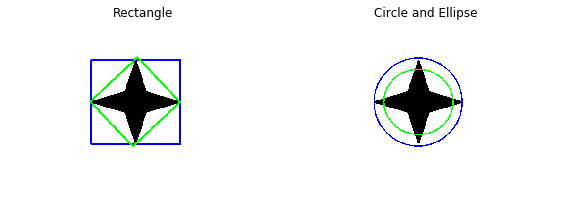

In [14]:
img = cv2.imread('bounding_rect.png')
img1 = img.copy()
img2 = img.copy()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
res, thr = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[1]
x, y, w, h = cv2.boundingRect(cnt)
cv2.rectangle(img1, (x, y), (x+w, y+h), (0, 0, 255), 3)

rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img1, [box], 0, (0, 255, 0), 3)

(x, y), radius = cv2.minEnclosingCircle(cnt)
center = (int(x), int(y))
radius = int(radius)
cv2.circle(img2, center, radius, (0, 0, 255), 2)

ellipse = cv2.fitEllipse(cnt)
cv2.ellipse(img2, ellipse, (0, 255, 0), 2)

images = [img1, img2]
titles = ['Rectangle', 'Circle and Ellipse']
plt.figure(figsize=(8, 8))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(titles[i])
    plt.imshow(images[i])
    plt.axis('off')
    
plt.tight_layout()
plt.show()

In [5]:
def onChange(x):
    pass

img = cv2.imread('national_park_service_pictogramss.png')
img = cv2. resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
res, thr = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.namedWindow('Show Image')
cv2.createTrackbar('index', 'Show Image', 0, len(contours)-1, onChange)

while True:
    img_copy = img.copy()
    cv2.imshow('Show Image', img_copy)
    
    index = cv2.getTrackbarPos('index', 'Show Image')
    cnt = contours[index]
    
    (x, y), radius = cv2.minEnclosingCircle(cnt)
    center = (int(x), int(y))
    radius = int(radius)
    cv2.circle(img_copy, center, radius, (0, 0, 255), 2)

    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(img_copy, ellipse, (0, 255, 0), 2)
    cv2.imshow('Show Image', img_copy)
    
    k = cv2.waitKey(0) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()

---
# Summary
1. Contour Approximation
2. Convex Hull
3. Bounding Rectangle
4. Enclosing Circle & Fitting Ellipse

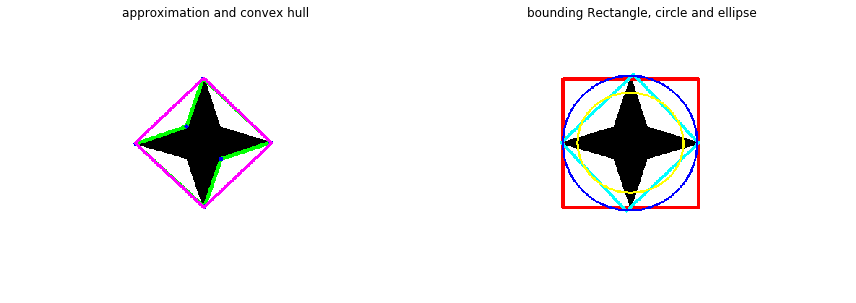

In [26]:
img = cv2.imread('bounding_rect.png')
img1 = img.copy()
img2 = img.copy()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
res, thr = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[1]
epsilon = 0.05 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)
cv2.drawContours(img1, [approx], -1, (0, 255, 0), 3)

for i in range(len(approx)):
    for j in range(len(approx[i])):
        cv2.circle(img1, (approx[i][j][0], approx[i][j][1]), 3, (0, 0, 255), -1)

hull = cv2.convexHull(cnt)
cv2.drawContours(img1, [hull], -1, (255, 0, 255), 3)

x, y, w, h = cv2.boundingRect(cnt)
cv2.rectangle(img2, (x, y), (x+w, y+h), (255, 0, 0), 3)

rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img2, [box], 0, (0, 255, 255), 3)

(x, y), radius = cv2.minEnclosingCircle(cnt)
center = (int(x), int(y))
radius = int(radius)
cv2.circle(img2, center, radius, (0, 0, 255), 2)

ellipse = cv2.fitEllipse(cnt)
cv2.ellipse(img2, ellipse, (255, 255, 0), 2)

images = [img1, img2]
titles = ["approximation and convex hull", "bounding Rectangle, circle and ellipse"]

plt.figure(figsize=(12, 12))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(titles[i])
    plt.imshow(images[i])
    plt.axis('off')
plt.tight_layout()
plt.show()